# Local search

In unconstrained optimization, we wish to solve problems of the form
\begin{align}
\text{minimize} & & E(w) 
\end{align}

* The local search algorithms have the form :
\begin{align}
w_0 & = \text{some initial value} \\
\text{for}\;\; & \tau = 1, 2,\dots \\
& w_\tau = w_{\tau-1} + g_\tau
\end{align}

Here, $g_\tau$ is a search direction. The loop is executed until a convergence condition is satisfied or 
the maximum number of iterations is reached. The algorithm iteratively search for solutions that achieve a lower objective value by moving in the search direction.

# Gradient Descent 
* Gradient descent is a popular local search method with the search direction chosen as the negative gradient direction:
\begin{align}
g_\tau & =  - \eta \nabla E(w_{\tau-1})
\end{align}

* When the gradient vanishes, i.e., $\nabla E(w) = 0$, the algorithm does not make any progress. Such points are also called fixed points. 

* The iterates, under certain conditions, converge to the minimum $w^* = \arg\min_{w} E(w)$. A natural question here finding the conditions for guaranteed convergence to a fixed point and the rate -- how fast convergence happens as a function of iterations

* The parameter $\eta$ is called the *learning rate*, to be chosen depending on the problem. If the learning rate is not properly chosen, the algorithm can (and will) diverge.

* There is a well developed theory on how to choose $\eta$ adaptively to speed up covergence.

* Even for minimizing quadratic objective functions, or equivalently for solving linear systems, gradient descent can have a quite poor converge properties: it takes a lot of iterations to find the minimum. However, it is applicable as a practical method in many problems as it requires only the calculation of the gradient.

* For maximization problems
\begin{align}
\text{maximize} & & E(w) 
\end{align}
we just move in the direction of the gradient so the search direction is $g_\tau = \eta \nabla E(w_{\tau-1})$


In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc

mpl.rc('font',**{'size': 20, 'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex=True)

import time
import numpy as np

y = np.array([7.04, 7.95, 7.58, 7.81, 8.33, 7.96, 8.24, 8.26, 7.84, 6.82, 5.68])
x = np.array(np.linspace(-1,1,11))
N = len(x)

# Design matrix
#A = np.vstack((np.ones(N), x, x**2, x**3)).T
degree = 9
A = np.hstack([np.power(x.reshape(N,1),i) for i in range(degree+1)])

# Learning rate
eta = 0.001
              
# initial parameters
w = np.array(np.random.randn(degree+1))
W = []
Err = []
for epoch in range(50000):  
    # Error
    err = y-A.dot(w)
    
    # Total error
    E = np.sum(err**2)/N
    
    # Gradient
    dE = -2.*A.T.dot(err)/N
    
    if epoch%100 == 0: 
        #print(epoch,':',E)
        # print(w)    
        W.append(w)
        Err.append(E)

    # Perfom one descent step
    w = w - eta*dE

The following cell demonstrates interactively the progress of plain gradient descent 
and how its solution differs from the optimum found by solving the corresponding least squares problem.



In [2]:

fig = plt.figure(figsize=(5,5))

left = -1.5
right = 1.5
xx = np.linspace(left,right,50)
AA = np.hstack((np.power(xx.reshape(len(xx),1),i) for i in range(degree+1)))

# Find best
A_orth, R = np.linalg.qr(A)
w_orth, res, rank, s = np.linalg.lstsq(A_orth, y)
w_star = np.linalg.solve(R, w_orth)
yy = AA.dot(w_star)

#ax.set_xlim((2,15))

#dots = plt.Line2D(x,y, linestyle='', markerfacecolor='b',marker='o', alpha=0.5, markersize=5)
#ax.add_line(dots)
plt.plot(x,y, linestyle='', markerfacecolor='b',marker='o', alpha=0.5, markersize=5)
plt.plot(xx, yy, linestyle=':', color='k', alpha=0.3)
ln = plt.Line2D(xdata=[], ydata=[], linestyle='-',linewidth=2)


ax = fig.gca()
ax.add_line(ln)
plt.close(fig)

ax.set_xlim((left,right))
ax.set_ylim((5,9))

def plot_gd(iteration=0):
    w = W[iteration]
    f = AA.dot(w)
    #print(w)
    ln.set_ydata(f)
    ln.set_xdata(xx)
    
    ax.set_title('$E = '+str(Err[iteration])+'$')
    
    display(fig)
    
res = interact(plot_gd, iteration=(0,len(W)-1))


interactive(children=(IntSlider(value=0, description='iteration', max=499), Output()), _dom_classes=('widget-interact',))

Plotting the Error Surface

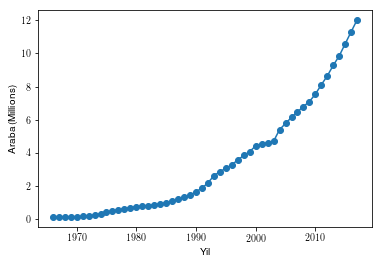

In [4]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
#df_arac[['Year','Car']]

BaseYear = 1995
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000000.

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Yil')
plt.ylabel('Araba (Millions)')

plt.show()

In [5]:
from itertools import product

def Error_Surface(y, A, left=0, right=1, bottom=0, top=1, step=0.1): 
    W0 = np.arange(left,right, step)
    W1 = np.arange(bottom,top, step)

    ErrSurf = np.zeros((len(W1),len(W0)))

    for i,j in product(range(len(W1)), range(len(W0))):
        e = y - A*np.matrix([W0[j], W1[i]]).T
        ErrSurf[i,j] = e.T*e/2
    
    return ErrSurf

In [3]:
BaseYear = 1995
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000000.

# Setup the vandermonde matrix
N = len(x)
A = np.hstack((np.ones((N,1)), x))



left = -5
right = 15
bottom = -4
top = 6
step = 0.05
ErrSurf = Error_Surface(y, A, left=left, right=right, top=top, bottom=bottom)

plt.figure(figsize=(10,10))
#plt.imshow(ErrSurf, interpolation='nearest', 
#           vmin=0, vmax=10000,origin='lower',
#           extent=(left,right,bottom,top), cmap='jet')

plt.contour(ErrSurf, 
            vmin=0, vmax=10000,origin='lower', levels=np.linspace(100,5000,10),
            extent=(left,right,bottom,top), cmap='jet')

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Error Surface')
#plt.colorbar(orientation='horizontal')
plt.show()

NameError: name 'df_arac' is not defined

### Animation of Gradient descent

In [4]:
%matplotlib inline
import matplotlib.pylab as plt

import time
from IPython import display
import numpy as np

# Setup the Design matrix
N = len(x)
A = np.hstack((np.ones((N,1)), x))

# Starting point
w = np.matrix('[15; -6]')

# Number of iterations
EPOCH = 200

# Learning rate: The following is the largest possible fixed rate for this problem
#eta = 0.0001696
eta = 0.0001696

fig = plt.figure()
ax = fig.gca()

plt.plot(x+BaseYear, y, 'o-')

plt.xlabel('x')
plt.ylabel('y')

f = A.dot(w)
ln = plt.Line2D(xdata=x+BaseYear, ydata=f, linestyle='-',linewidth=2,color='red')
ax.add_line(ln)

for epoch in range(EPOCH):
    f = A.dot(w)
    err = y-f
    
    ln.set_xdata(x)
    ln.set_ydata(f)
    
    E = np.sum(err.T*err)/2
    dE = -A.T.dot(err)
    
#    if epoch%1 == 0: 
#        print(epoch,':',E)
        # print(w)    
        
    w = w - eta*dE

    ax.set_title(E)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)

ValueError: all the input arrays must have same number of dimensions

In [5]:
# An implementation of Gradient Descent for solving linear a system

# Setup the Design matrix
N = len(x)
A = np.hstack((np.ones((N,1)), x))

# Starting point
w = np.matrix('[15; -6]')

# Number of iterations
EPOCH = 5000

# Learning rate: The following is the largest possible fixed rate for this problem
#eta = 0.00016
eta = 0.000161

Error = np.zeros((EPOCH))
W = np.zeros((2,EPOCH))

for tau in range(EPOCH):
    # Calculate the error
    e = y - A*w    
    
    # Store the intermediate results
    W[0,tau] = w[0]
    W[1,tau] = w[1]
    Error[tau] = (e.T*e)/2
    
    # Compute the gradient descent step
    g = -A.T*e
    w = w - eta*g
    #print(w.T)
    
w_star = w    
plt.figure(figsize=(8,8))
plt.imshow(ErrSurf, interpolation='nearest', 
           vmin=0, vmax=1000,origin='lower',
           extent=(left,right,bottom,top))
plt.xlabel('w0')
plt.ylabel('w1')

ln = plt.Line2D(W[0,:300:1], W[1,:300:1], marker='o',markerfacecolor='w')
plt.gca().add_line(ln)

ln = plt.Line2D(w_star[0], w_star[1], marker='x',markerfacecolor='w')
plt.gca().add_line(ln)
plt.show()

plt.figure(figsize=(8,3))
plt.semilogy(Error)
plt.xlabel('Iteration tau')
plt.ylabel('Error')
plt.show()


ValueError: all the input arrays must have same number of dimensions

* The illustration shows the convergence of GD with learning rate near the limit where the convergence is oscillatory.

* $\eta$, Learning rate is a parameter of the algorithm

* $w$, the variable are the parameters of the Model 

* $y$: Targets

* $x$: Inputs, 

# Accelerating Gradient descent

## Momentum methods, a.k.a., heavy ball

\begin{align}
p(\tau) & =  \nabla E(w(\tau-1)) + \beta p(\tau-1) \\
w(\tau) & =  w(\tau-1) - \alpha p(\tau) 
\end{align}

When $\beta=0$, we recover gradient descent.


/Users/cemgil/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cemgil/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cemgil/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


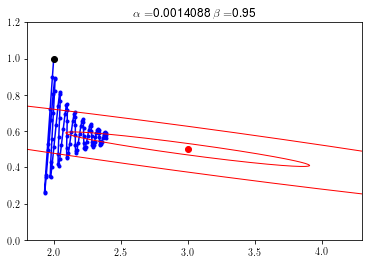

In [6]:
%matplotlib inline
import matplotlib.pylab as plt

from notes_utilities import pnorm_ball_line


import time
from IPython import display
import numpy as np


#y = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
#y = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
N = len(x)

# Design matrix
A = np.vstack((np.ones(N), x)).T

w_best, E, rank, s = np.linalg.lstsq(A, y)
err = y-A.dot(w_best)
E_min = np.sum(err**2)/N


def inspect_momentum(alpha = 0.005, beta = 0.97):
    ln = pnorm_ball_line(mu=w_best, A=np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)
    ln2 = pnorm_ball_line(mu=w_best, A=4*np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)

    # initial parameters
    w0 = np.array([2., 1.])
    w = w0.copy()
    p = np.zeros(2)

    EPOCHS = 100
    W = np.zeros((2,EPOCHS))
    for epoch in range(EPOCHS):
        # Error
        err = y-A.dot(w)
        W[:,epoch] = w    
        # Mean square error
        E = np.sum(err**2)/N

        # Gradient
        dE = -2.*A.T.dot(err)/N
        p = dE + beta*p

#        if epoch%10 == 1: 
#            print(epoch,':',E)
            # print(w)    

        # Perfom one descent step
        w = w - alpha*p


#    print(E_min)

    plt.plot(W[0,:],W[1,:],'.-b')
    plt.plot(w_best[0],w_best[1],'ro')
    plt.plot(w0[0],w0[1],'ko')
    plt.xlim((1.8,4.3))
    plt.ylim((0,1.2))
    plt.title('$\\alpha = $'+str(alpha)+' $\\beta = $'+str(beta))
    plt.gca().add_line(ln)
    plt.gca().add_line(ln2)
    plt.show()
    
inspect_momentum(alpha=0.0014088, beta=0.95)



In [7]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.pylab as plt
from IPython.display import clear_output, display, HTML

interact(inspect_momentum, alpha=(0, 0.02, 0.001), beta=(0, 0.99, 0.001))

interactive(children=(FloatSlider(value=0.005, description='alpha', max=0.02, step=0.001), FloatSlider(value=0.97, description='beta', max=0.99, step=0.001), Output()), _dom_classes=('widget-interact',))

<function __main__.inspect_momentum>

# Advanced Material

Why does momentum work? by Goh. Interactive articles
https://distill.pub/2017/momentum/

Beyond vanilla Gradient Descent, Sebastian Ruder blog
http://ruder.io/optimizing-gradient-descent/

Blog post by M. Hardt
http://blog.mrtz.org/2013/09/07/the-zen-of-gradient-descent.html

A great talk by Ben Recht:
https://simons.berkeley.edu/talks/ben-recht-2013-09-04

Backpropagation, by blog post by S. Arora
http://www.offconvex.org/2016/12/20/backprop/

## Analysis of convergence of Gradient descent for a quadratic function

Recall that the error function we minimize is
$$
E(w) = \frac{1}{2} (y-Aw)^T(y-Aw) = \frac{1}{2}(y^\top y - 2 y^\top A w + w^\top A^\top A w)
$$

The gradient at the point $w$ will be denoted as $\nabla E(w) = g(w)$ where
$$g(w) = -A^\top (y - Aw) = A^\top A w - A^\top y$$

Moreover, the gradient at the minimum will vanish:
$$
g(w_\star) = 0
$$
Indeed, we can solve 
$$0 = A^\top (Aw_\star - y)$$
as
$$w_\star =  (A^\top A)^{-1}A^\top y  $$
but this is not our point.

For a constant learning rate $\eta$, gradient descent executes the following iteration
$$
w_t = w_{t-1} - \eta g(w_{t-1}) = w_{t-1} - \eta A^\top (Aw_{t-1} - y)
$$

$$
w_t  =  (I - \eta A^\top A) w_{t-1} + \eta A^\top y
$$

This is a fixed point equation of form
$$
w_t  =  T(w_{t-1}) 
$$
where $T$ is an affine transformation. 

We will assume that $T$ is a contraction, i.e. for any two different
parameters $w$ and $w'$ in the domain we have
$$
\| T(w) - T(w') \| \leq L_\eta \|w-w' \|
$$

where $L_\eta < 1$, then the distance shrinks. Hence the mapping converges to a fixed point (this is a consequence of a deeper result in analysis called the Brouwer fixed-point theorem (https://en.0wikipedia.org/wiki/Brouwer_fixed-point_theorem))

We will consider in particular the distance between the optimum and the current point $w(t)$

$$
\| T(w_t) - T(w_\star) \| \leq L_\eta \|w_t - w_\star \|
$$
But we have 
$T(w_\star) = w_\star$ and $w_t = T(w_{t-1})$ so
$\|w_t - w_\star \| = \|T(w_{t-1}) - T(w_\star) \|$. 

\begin{align}
\| T(w_t) - T(w_\star) \| & \leq L_\eta \|T(w_{t-1}) - T(w_\star) \| \\
& \leq L^2_\eta \|T(w_{t-2}) - T(w_\star) \| \\
\vdots \\
& \leq L^{t+1}_\eta \| w_{0} - w_\star \| 
\end{align}


$$
T(w)   =  (I - \eta A^\top A) w + \eta A^\top y
$$

$$
T(w_\star)   =  (I - \eta A^\top A) w_\star + \eta A^\top y
$$

$$
\| T(w) - T(w') \| = \| (I - \eta A^\top A) (w-w') \| \leq \| I - \eta A^\top A \| \| w-w' \|
$$

When the norm of the matrix $\| I - \eta A^\top A \| < 1$ we have convergence. Here we take the operator norm, i.e., the magnitude of the largest eigenvalue.

Below, we plot the absolute value of the maximum eigenvalues of $I - \eta A^\top A$ as a function of $\eta$.

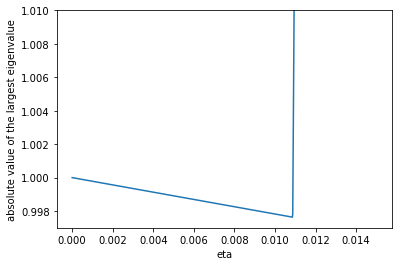

In [56]:

left = 0.0000
right = 0.015

N = 1000
ETA = np.linspace(left,right,N)

def compute_largest_eig(ETA, A):
    
    LAM = np.zeros(N)
    D = A.shape[1]
    n = A.shape[0]
    
    for i,eta in enumerate(ETA):
        #print(eta)
        lam,v = np.linalg.eig(np.eye(D) - 2*eta*A.T.dot(A)/n)
        LAM[i] = np.max(np.abs(lam))
        
    return LAM

# This number is L_\eta
LAM = compute_largest_eig(ETA, A)

plt.plot(ETA, LAM)
#plt.plot(ETA, np.ones((N,1)))
#plt.gca().set_ylim([0.98, 1.02])
plt.ylim([0.997,1.01])
plt.xlabel('eta')
plt.ylabel('absolute value of the largest eigenvalue')
plt.show()


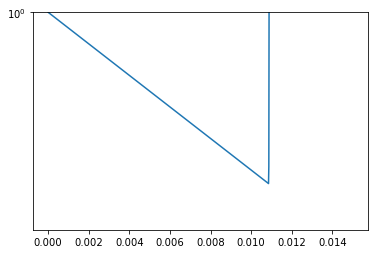

In [51]:
plt.semilogy(ETA,LAM)
plt.ylim([0.997,1])
plt.show()

If $E$ is twice differentiable, contractivity means that $E$ is convex.

For $t>0$
\begin{align}
\|T(x + t \Delta x) - T(x) \| & \leq \rho \|t \Delta x\| \\
\frac{1}{t} \|T(x + t \Delta x) - T(x) \| &\leq \rho \|\Delta x\| 
\end{align}

If we can show that $\rho< 1$, then $T$ is a contraction.

By definitions
$$
T(x)  = x - \alpha \nabla E(x)
$$

$$
T(x + t \Delta x)  = x + t \Delta x - \alpha \nabla E(x + t \Delta x)
$$

\begin{align}
\frac{1}{t} \|T(x + t \Delta x) - T(x) \| & = \frac{1}{t} \|x + t \Delta x - \alpha \nabla E(x + t \Delta x) - x + \alpha \nabla E(x) \| \\
& = \| \Delta x - \frac{\alpha}{t}  (\nabla E(x + t \Delta x) - \nabla E(x) ) \|  \\
\end{align}

As this relation holds for all $t$, we take the limit when $t\rightarrow 0^+$

\begin{align}
\| \Delta x - \alpha \nabla^2 E(x) \Delta x  \| & =  \| (I - \alpha \nabla^2 E(x)) \Delta x  \| \\
& \leq \| I - \alpha \nabla^2 E(x) \| \| \Delta x  \| 
\end{align}

If we can choose $\alpha$ for all $\xi$ in the domain such that 
$$
\| I - \alpha \nabla^2 E(\xi) \| \leq \rho < 1
$$
is satisfied, we have a sufficient condition for a contraction.

Lemma:

Assume that for $0 \leq \rho < 1$, $\alpha> 0$ and $U(\xi)$ is a symmetric matrix valued function for all $\xi \in \mathcal{D}$ and we have 
$$
\| I - \alpha U(\xi) \| \leq \rho 
$$
then $U = U(\xi)$ is positive semidefinite with $$\frac{1 - \rho}{\alpha} I \preceq U $$ for every $\xi$.

Proof:

$$
\|I - \alpha U \| = \sup_{x\neq 0} \frac{x^\top(I - \alpha U )x }{x^\top x} \leq \rho
$$

$$
x^\top(I - \alpha U )x \leq \rho x^\top x
$$

$$
(1- \rho) x^\top x  \leq \alpha x^\top U x
$$

This implies that for all $x$ we have
$$
0 \leq x^\top (U - \frac{1 - \rho}{\alpha} I) x
$$
In other words, the matrix $U - \frac{1 - \rho}{\alpha} I$ is positive semidefinite, or:

$$
\frac{1 - \rho}{\alpha} I \preceq U
$$
We now see that $\rho<1$ we have the guarantee that $U$ is positive semidefinite.

$$
T(x) = M x + b
$$

$$
\|T(x) - T(x_\star) \| = \|Mx + b - M x_\star + b \| = \| M(x-x_\star) \|
$$

By Schwarz inequality

$$
\|T(x) - T(x_\star) \| \leq \|M\| \|x-x_\star\|
$$
If $\|M\| < 1$, we have a contraction. Assume the existence of a fixed point $x_\star$ such that $x_\star = T(x_\star)$. (Does a fixed point always exist for a contraction?)

In [ ]:
# Try to fit with GD to the original data
BaseYear2 = 0
x2 = np.matrix(df_arac.Year[31:]).T-BaseYear2

# Setup the vandermonde matrix
N = len(x2)
A = np.hstack((np.ones((N,1)), x2))

left = -8
right = -7.55
N = 100
ETA = np.logspace(left,right,N)

LAM = compute_largest_eig(ETA, A)

plt.plot(ETA, LAM)
plt.plot(ETA, np.ones((N,1)))
plt.gca().set_ylim([0.98, 1.02])
plt.xlabel('eta')
plt.ylabel('absolute value of the largest eigenvalue')
plt.show()



Analysis of Momentum

\begin{align}
p(\tau) & =  \nabla E(w(\tau-1)) + \beta p(\tau-1) \\
w(\tau) & =  w(\tau-1) - \alpha p(\tau) \\
w(\tau-1) & =  w(\tau-2) - \alpha p(\tau-1) \\
\end{align}

\begin{align}
\left(\begin{array}{c}
w(\tau) \\
w(\tau-1)
\end{array}
\right)
& = &\left(\begin{array}{cc}
\cdot & \cdot \\
\cdot & \cdot
\end{array}
\right)
\left(\begin{array}{c}
w(\tau-1) \\
w(\tau-2)
\end{array}
\right)
\end{align}


\begin{align}
\frac{1}{\alpha}(w(\tau-1) - w(\tau))  & =  p(\tau) =  \nabla E(w(\tau-1)) + \beta \frac{1}{\alpha}(w(\tau-2) - w(\tau-1)) = \\
\frac{1}{\alpha}(w(\tau-2) - w(\tau-1))  & =  p(\tau-1) \\
\end{align}

\begin{align}
\frac{1}{\alpha}(w(\tau-1) - w(\tau))  & = \nabla E(w(\tau-1)) + \beta \frac{1}{\alpha}(w(\tau-2) - w(\tau-1)) \\
  w(\tau)  & = -\alpha \nabla E(w(\tau-1)) - \beta w(\tau-2) + (\beta+1)  w(\tau-1)
\end{align}



* Note that GD is sensetive to scaling of data
* For example, if we would not have shifted the $x$ axis our original data, GD might not have worked. The maximum eigenvalue is very close to $1$ for all $\eta$ upto numerical precision

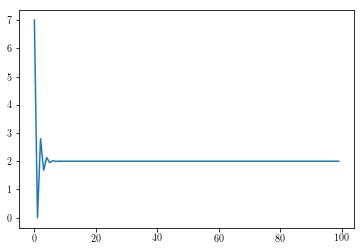

In [30]:
w = 7
alpha = 0.7
EPOCH = 100
W = []
for tau in range(EPOCH):
    W.append(w)
    w = w - alpha*(2*w - 4)

plt.plot(W)
plt.show()

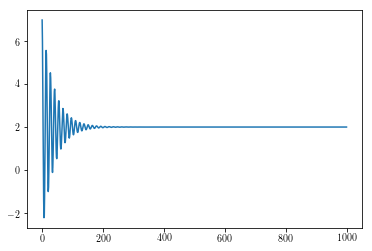

In [36]:
w = 7
alpha = 0.1
beta = 0.95
p = 0
EPOCH = 1000
W = []
for tau in range(EPOCH):
    W.append(w)
    p = (2*w - 4) + beta*p
    w = w - alpha*p

plt.plot(W)
plt.show()